In [79]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from blacksholes.model import BlackSholesModel

In [80]:
import datetime as dt
from dateutil.relativedelta import relativedelta
import numpy as np
import pandas as pd
import pandas_datareader.data as web
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 10]

In [81]:
end = dt.datetime.today()
start = end - relativedelta(years=1)

df = web.DataReader('BARC.L', 'yahoo', start, end)
df = df.sort_values(by="Date")

In [82]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-20,181.000000,177.419998,180.740005,178.880005,28753461.0,172.961670
2021-05-21,180.000000,176.740005,178.880005,179.020004,32681504.0,173.097046
2021-05-24,180.979996,178.160004,180.100006,179.679993,18683315.0,173.735199
2021-05-25,181.619995,178.940002,180.320007,179.639999,26189150.0,173.696533
2021-05-26,179.572998,175.119995,178.839996,179.259995,40727970.0,173.329086
...,...,...,...,...,...,...
2022-05-13,150.544998,147.000000,147.559998,150.360001,40300228.0,150.360001
2022-05-16,152.983002,148.940002,150.600006,151.699997,48063820.0,151.699997
2022-05-17,157.080002,152.179993,152.380005,155.860001,50124597.0,155.860001


In [83]:
df['previous_close'] = df.Close.shift(1)
df['returns'] = ((df.Close - df.previous_close)/df.previous_close)

In [84]:
df

,High,Low,Open,Close,Volume,Adj Close,previous_close,returns
Date,,,,,,,,
2021-05-20,181.000000,177.419998,180.740005,178.880005,28753461.0,172.961670,NaN,NaN
2021-05-21,180.000000,176.740005,178.880005,179.020004,32681504.0,173.097046,178.880005,0.000783
2021-05-24,180.979996,178.160004,180.100006,179.679993,18683315.0,173.735199,179.020004,0.003687
2021-05-25,181.619995,178.940002,180.320007,179.639999,26189150.0,173.696533,179.679993,-0.000223
2021-05-26,179.572998,175.119995,178.839996,179.259995,40727970.0,173.329086,179.639999,-0.002115
...,...,...,...,...,...,...,...,...
2022-05-13,150.544998,147.000000,147.559998,150.360001,40300228.0,150.360001,145.940002,0.030286
2022-05-16,152.983002,148.940002,150.600006,151.699997,48063820.0,151.699997,150.360001,0.008912
2022-05-17,157.080002,152.179993,152.380005,155.860001,50124597.0,155.860001,151.699997,0.027423


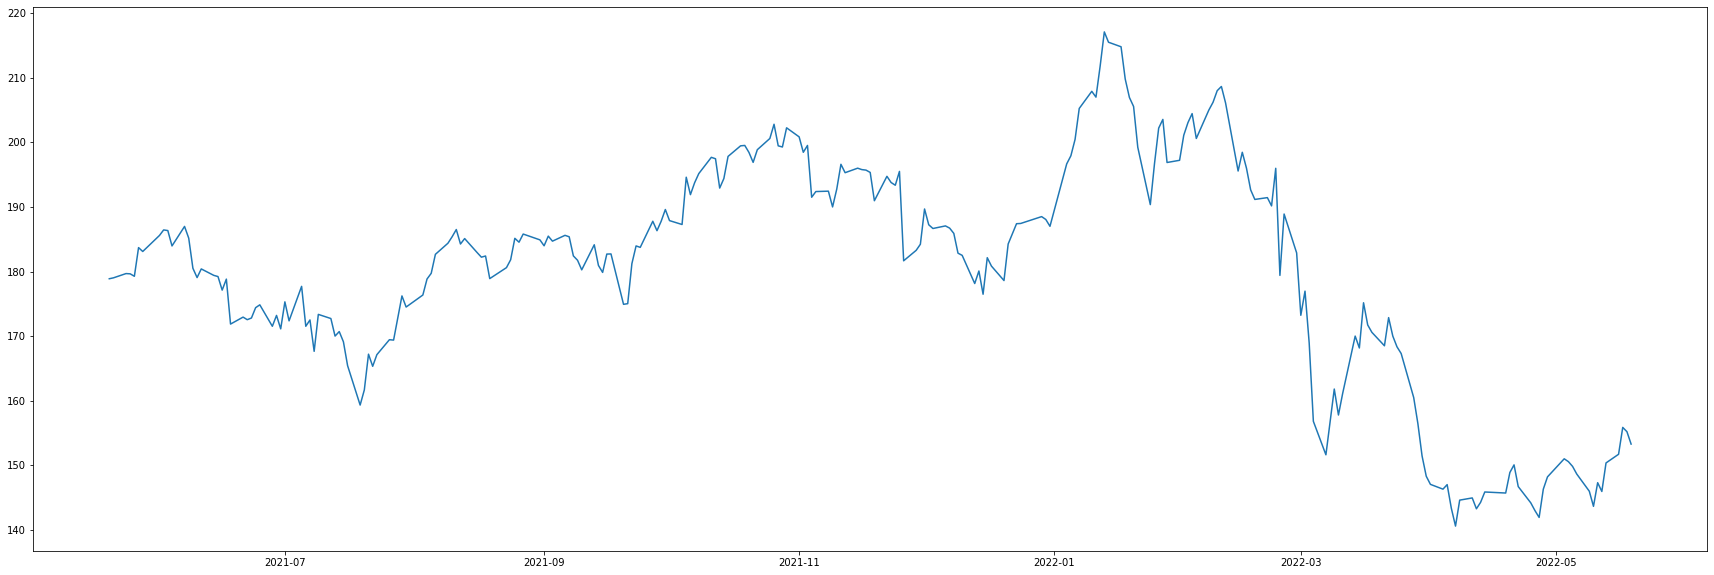

In [85]:
plt.plot(df.Close)

In [86]:
sigma = np.sqrt(252) * df['returns'].std()
# https://www.wallstreetmojo.com/volatility-formula/

In [87]:
risk_free_rate = 0.01866
# 19th May
# https://www.marketwatch.com/investing/Bond/TMBMKGB-10Y?countryCode=BX

In [88]:
spot = df['Close'].iloc[-1]
strike = 160

In [89]:
expiry = end + relativedelta(months=1)
t = (expiry - dt.datetime.utcnow()).days / 365

In [90]:
model = BlackSholesModel(risk_free_rate, spot, strike, t, sigma)


In [91]:
price, success = model.get_call_price(2)

if success:
    print('The Option Price is:', price)

The Option Price is: 3.22
